<a href="https://colab.research.google.com/github/Enkerli/Git-Branchy-Story-Exercise-02/blob/master/FedeClean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
import pandas as pd
import numpy as np
from pandas import Series
from bs4 import BeautifulSoup
from IPython.display import HTML
#from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
% matplotlib inline

In [54]:
fede=pd.read_excel('/content/FedeCegepSFC_v20201116.xlsx')

In [55]:
fede.drop(columns='Titre', inplace=True)
fede.rename(columns={'description': 'Description (HTML)', 1535: 'Collège', 'Titre.1':'Titre'}, inplace=True)

In [56]:
fede.loc[(fede['Région'].str.contains("</div>")), 'Région']='Montréal'
fede.loc[(fede['Région'].str.contains("Capitale")), 'Région']='Capitale-Nationale'
fede['Description'] = [BeautifulSoup(text).get_text() for text in fede['Description (HTML)'] ]

In [57]:
fede.sort_values('Description', ascending=False)

,ID,Domaine,Descriptif,Collège,Région,Description (HTML),Langue,Durée de la formation,Titre,urlformation,Description
1723,5122,Administration et gestion, Introduction à l’environnement***  Création...,Trois-Rivières,Mauricie - Centre-du-Québec,<p> Introduction à l’environnement<br>  Créa...,Français,15 h,Travailler efficacement en équipe avec Google ...,/demande, Introduction à l’environnement  Création de...
1724,5123,Administration et gestion, Décrire les bénéfices reliés à la modélisati...,Trois-Rivières,Mauricie - Centre-du-Québec,<p> Décrire les bénéfices reliés à la modélis...,Français,45 h,Revit - Modélisation 3D,https://formation-mauricie.ca/courslacarte/rev..., Décrire les bénéfices reliés à la modélisati...
1482,4763,Informatique et T.I.,•&nbsp; &nbsp;Créer un bloc-notes*** •&nbsp; &...,Saint-Jean-sur-Richelieu,Montérégie,<p>• Créer un bloc-notes<br> • Organiser d...,Français,6 h ...,Gérer mes réunions avec OneNote,https://cstjean-formationcontinue.omnivox.ca/,• Créer un bloc-notes • Organiser des bloc...
1559,4872,Informatique et T.I.,•&nbsp; &nbsp;Créer un bloc-notes*** •&nbsp; &...,Saint-Jean-sur-Richelieu (Campus de Brossard),Montérégie,<p>• Créer un bloc-notes<br> • Organiser d...,Français,6 h ...,Gérer mes réunions avec OneNote,https://cstjean-formationcontinue.omnivox.ca/,• Créer un bloc-notes • Organiser des bloc...
79,1490,Électronique,• Électronique • Microélectronique • Microcont...,Lionel-Groulx,"Laval, Laurentides, Lanaudière",<p>• Électronique • Microélectronique • Microc...,Français,à déterminer avec le client ...,Électronique et robotique,http://www.formationcontinue.clg.qc.ca/service...,• Électronique • Microélectronique • Microcont...
...,...,...,...,...,...,...,...,...,...,...,...
758,3015,"Industriel : production manufacturière, amélio...",NaN,Jonquière,Saguenay - Lac-Saint-Jean,"<div class=""description-cegep""> ...",Français,À déterminer ...,Automatisation et contrôle,/demande,
759,3016,Langues et francisation,NaN,Jonquière,Saguenay - Lac-Saint-Jean,"<div class=""description-cegep""> ...",Français,À déterminer ...,Anglais,/demande,
760,3017,Langues et francisation,NaN,Jonquière,Saguenay - Lac-Saint-Jean,"<div class=""description-cegep""> ...",Français,À déterminer ...,Français,/demande,
1720,5119,Administration et gestion,NaN,Trois-Rivières,Mauricie - Centre-du-Québec,"<div class=""description-cegep""> ...",Français,15 h,"Excel (5 modules disponibles, dont programmati...",/demande,


In [58]:
motsvides=set(STOPWORDS)
motsvides.update(["atelier","!", "$", "%", "&", "-", ".", "0", "1", "10", "100", "11", "12", "13", "14", "15", "16", "17", "18", "19", "1990", "1991", "1992", "1993", "1994", "1995", "1996", "1997", "1998", "1999", "2", "20", "2000", "2001", "2002", "2003", "2004", "2005", "2006", "2007", "2008", "2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020", "21", "22", "23", "24", "25", "26", "27", "28", "29", "3", "30", "31", "32", "33", "34", "35", "36", "37", "38", "39", "4", "40", "41", "42", "43", "44", "45", "46", "47", "48", "49", "5", "50", "51", "52", "53", "54", "55", "56", "57", "58", "59", "6", "60", "61", "62", "63", "64", "65", "66", "67", "68", "69", "7", "70", "71", "72", "73", "74", "75", "76", "77", "78", "8", "80", "81", "82", "83", "84", "85", "86", "87", "88", "89", "9", "90", "91", "92", "93", "94", "95", "96", "97", "98", "99", ":", ";", "<", ">", "@", "\(", "\)", "\*", "\+", "\?", "\[", "\]", "\^", "\{", "\}", "a", "about", "above", "acaba", "acquis", "across", "activités", "afin", "after", "afterwards", "again", "against", "ah", "ai", "aie", "aient", "aies", "ainsi", "ait", "al", "alguna", "algunas", "alguno", "algunos", "algún", "all", "almost", "alone", "along", "alors", "already", "also", "although", "altmış", "altı", "always", "am", "ama", "ambos", "among", "amongst", "amoungst", "amount", "ampleamos", "améliorer", "an", "ancak", "and", "another", "ante", "antes", "any", "anyhow", "anyone", "anything", "anyway", "anywhere", "ap.", "appliquer", "apprendre", "approche", "apr.", "après", "aquel", "aquellas", "aquellos", "aqui", "arada", "are", "around", "arriba", "as", "aslında", "at", "atras", "attendu", "au", "au-delà", "au-devant", "aucun", "aucune", "audit", "auprès", "auquel", "aura", "aurai", "auraient", "aurais", "aurait", "auras", "aurez", "auriez", "aurions", "aurons", "auront", "aussi", "autour", "autre", "autres", "autrui", "aux", "auxdites", "auxdits", "auxquelles", "auxquels", "avaient", "avais", "avait", "avant", "avantages", "avec", "avez", "aviez", "avions", "avoir", "avons", "ayant", "ayez", "ayons", "ayrıca", "b", "back", "bah", "bajo", "bana", "banco", "base", "bases", "bastante", "bazı", "be", "because", "been", "before", "beforehand", "being", "belki", "ben", "benden", "beni", "benim", "beri", "beside", "besides", "besoins", "between", "beş", "bien", "bile", "bin", "bir", "biri", "birkaç", "birkez", "birçok", "birşey", "birşeyi", "biz", "bizden", "bize", "bizi", "bizim", "bonne", "both", "bottom", "bu", "buna", "bunda", "bundan", "bunlar", "bunları", "bunların", "bunu", "bunun", "burada", "but", "by", "bé", "böyle", "böylece", "c", "c'", "c'est", "c'était", "cada", "call", "can", "cannot", "cant", "car", "ce", "ceci", "cela", "celle", "celle-ci", "celle-là", "celles", "celles-ci", "celles-là", "celui", "celui-ci", "celui-là", "celà", "cent", "cents", "cependant", "certain", "certaine", "certaines", "certains", "ces", "cet", "cette", "ceux", "ceux-ci", "ceux-là", "cf.", "cg", "cgr", "chacun", "chacune", "changement", "chaque", "chez", "choix", "ci", "cierta", "ciertas", "ciertos", "cinq", "cinquante", "cinquante-cinq", "cinquante-deux", "cinquante-et-un", "cinquante-huit", "cinquante-neuf", "cinquante-quatre", "cinquante-sept", "cinquante-six", "cinquante-trois", "cl", "client", "cm", "cm²", "co", "comme", "comment", "como", "comprendre", "comptabilité", "compétences", "con", "concepts", "concevoir", "connaissance", "connaissances", "connaître", "conseguimos", "conseguir", "consigo", "consigue", "consiguen", "consigues", "contenu", "contexte", "contre", "contrôle", "could", "couldnt", "cours", "créer", "cual", "cuando", "cégep", "d", "d'", "d'après", "d'un", "d'une", "da", "daha", "dahi", "dans", "de", "defa", "del", "demande", "dentro", "depuis", "derrière", "des", "description", "desdites", "desdits", "desquelles", "desquels", "deux", "devant", "devers", "değil", "dg", "did", "didn't", "différentes", "différents", "divers", "diverses", "dix", "dix-huit", "dix-neuf", "dix-sept", "diye", "diğer", "dl", "dm", "do", "document", "documents", "does", "doesn't", "doksan", "dokuz", "dolayı", "dolayısıyla", "domaine", "don't", "donc", "donde", "done", "dont", "dos", "douze", "down", "du", "dudit", "due", "duquel", "durant", "during", "durée", "dès", "début", "débutant", "définir", "déjà", "développer", "dört", "d’acquérir", "d’un", "d’une", "e", "each", "edecek", "eden", "ederek", "edilecek", "ediliyor", "edilmesi", "ediyor", "effectuer", "efficace", "efficacement", "eg", "eh", "eight", "either", "el", "eleven", "ellas", "elle", "elles", "elli", "ellos", "else", "elsewhere", "empleais", "emplean", "emplear", "empleas", "empleo", "en", "en-dehors", "encima", "encore", "enfin", "enough", "entonces", "entre", "envers", "era", "eramos", "eran", "eras", "eres", "es", "est", "esta", "estaba", "estado", "estais", "estamos", "estan", "estoy", "et", "etc", "etmesi", "etti", "ettiği", "ettiğini", "eu", "eue", "eues", "euh", "eurent", "eus", "eusse", "eussent", "eusses", "eussiez", "eussions", "eut", "eux", "even", "ever", "every", "everyone", "everything", "everywhere", "except", "eûmes", "eût", "eûtes", "eğer", "f", "faire", "fait", "familiariser", "façon", "few", "fi", "fifteen", "fify", "fill", "fin", "find", "fire", "first", "five", "flac", "fonction", "fonctionnalités", "fonctions", "for", "formation", "forme", "former", "formerly", "fors", "forty", "found", "four", "from", "front", "fue", "fueron", "fui", "fuimos", "full", "furent", "further", "fus", "fusse", "fussent", "fusses", "fussiez", "fussions", "fut", "fûmes", "fût", "fûtes", "g", "gestion", "get", "ghz", "gibi", "give", "go", "gr", "grâce", "gueno", "gérer", "göre", "h", "ha", "habiletés", "hace", "haceis", "hacemos", "hacen", "hacer", "haces", "had", "hago", "halen", "han", "hangi", "has", "hasnt", "hatta", "have", "he", "hein", "hem", "hence", "henüz", "hep", "hepsi", "her", "here", "hereafter", "hereby", "herein", "hereupon", "herhangi", "herkesin", "hers", "herself", "heu", "heures", "hg", "him", "himself", "his", "hiç", "hiçbir", "hl", "hm", "hm³", "holà", "hop", "hormis", "hors", "how", "however", "huit", "hum", "hundred", "hé", "i", "ici", "identifier", "ie", "if", "iki", "il", "ile", "ilgili", "ils", "in", "inc", "incluso", "indeed", "intenta", "intentais", "intentamos", "intentan", "intentar", "intentas", "intento", "intermédiaire", "into", "introduction", "ir", "is", "ise", "it", "itibaren", "itibariyle", "its", "itself", "için", "işte", "j", "j'", "j'ai", "j'avais", "j'étais", "jamais", "je", "jour", "jusqu'", "jusqu'au", "jusqu'aux", "jusqu'à", "jusque", "k", "kadar", "karşın", "katrilyon", "keep", "kendi", "kendilerine", "kendini", "kendisi", "kendisine", "kendisini", "kez", "kg", "ki", "kim", "kimden", "kime", "kimi", "kimse", "km", "km²", "kırk", "l", "l'", "l'autre", "l'on", "l'un", "l'une", "la", "laquelle", "largo", "las", "last", "latter", "latterly", "le", "least", "lequel", "les", "lesquelles", "lesquels", "less", "leur", "leurs", "lez", "lo", "lors", "lorsqu'", "lorsque", "los", "ltd", "lui", "lès", "l’aide", "l’utilisation", "m", "m'", "ma", "made", "maint", "mainte", "maintes", "maints", "mais", "malgré", "many", "matière", "may", "maîtriser", "me", "meanwhile", "mes", "mesure", "mettre", "mg", "mgr", "mhz", "mientras", "mieux", "might", "mil", "milieu", "mill", "mille", "milliards", "millions", "milyar", "milyon", "mine", "mio", "mise", "ml", "mm", "mm²", "modo", "module", "modules", "modèles", "moi", "moins", "mon", "more", "moreover", "most", "mostly", "move", "moyennant", "mt", "mu", "much", "muchos", "must", "muy", "my", "myself", "m²", "m³", "médias", "méthodes", "même", "mêmes", "mü", "mı", "n", "n'avait", "n'y", "name", "namely", "nasıl", "ne", "neden", "nedenle", "neither", "nerde", "nerede", "nereye", "neuf", "never", "nevertheless", "next", "ni", "nine", "niveau", "niye", "niçin", "no", "nobody", "non", "nonante", "none", "nonobstant", "noone", "nor", "nos", "nosotros", "not", "nothing", "notions", "notre", "nous", "nouvelles", "now", "nowhere", "nul", "nulle", "nº", "néanmoins", "nécessaires", "o", "objectif", "objectifs", "octante", "of", "off", "often", "oh", "olan", "olarak", "oldu", "olduklarını", "olduğu", "olduğunu", "olmadı", "olmadığı", "olmak", "olması", "olmayan", "olmaz", "olsa", "olsun", "olup", "olur", "olursa", "oluyor", "on", "ona", "once", "ondan", "one", "onlar", "onlardan", "onları", "onların", "only", "ont", "onto", "onu", "onun", "onze", "opérations", "or", "other", "others", "otherwise", "otro", "otuz", "ou", "our", "ours", "ourselves", "out", "outils", "outre", "over", "own", "oysa", "où", "p", "page", "par", "par-delà", "para", "parbleu", "parce", "parmi", "part", "participant", "participants", "pas", "passé", "pek", "pendant", "per", "performance", "perhaps", "permet", "permettant", "permettra", "pero", "personne", "personnes", "peu", "place", "plan", "planification", "please", "plus", "plus_d'un", "plus_d'une", "plusieurs", "podeis", "podemos", "poder", "podria", "podriais", "podriamos", "podrian", "podrias", "por", "por qué", "porque", "posséder", "pour", "pourquoi", "pourra", "pourtant", "pourvu", "pratique", "pratiques", "primero desde", "principaux", "principes", "problèmes", "processus", "produits", "programme", "projet", "projets", "près", "préalable", "préalables", "puede", "pueden", "puedo", "puisqu'", "puisque", "put", "q", "qu", "qu'", "qu'elle", "qu'elles", "qu'il", "qu'ils", "qu'on", "qualité", "quand", "quant", "quarante", "quarante-cinq", "quarante-deux", "quarante-et-un", "quarante-huit", "quarante-neuf", "quarante-quatre", "quarante-sept", "quarante-six", "quarante-trois", "quatorze", "quatre", "quatre-vingt", "quatre-vingt-cinq", "quatre-vingt-deux", "quatre-vingt-dix", "quatre-vingt-dix-huit", "quatre-vingt-dix-neuf", "quatre-vingt-dix-sept", "quatre-vingt-douze", "quatre-vingt-huit", "quatre-vingt-neuf", "quatre-vingt-onze", "quatre-vingt-quatorze", "quatre-vingt-quatre", "quatre-vingt-quinze", "quatre-vingt-seize", "quatre-vingt-sept", "quatre-vingt-six", "quatre-vingt-treize", "quatre-vingt-trois", "quatre-vingt-un", "quatre-vingt-une", "quatre-vingts", "que", "quel", "quelle", "quelles", "quelqu'", "quelqu'un", "quelqu'une", "quelque", "quelques", "quelques-unes", "quelques-uns", "quels", "qui", "quiconque", "quien", "quinze", "quoi", "quoiqu'", "quoique", "québec", "r", "rather", "rağmen", "re", "recherche", "reconnaître", "ressources", "revoici", "revoilà", "rien", "règles", "réalisation", "réaliser", "résultats", "rôle", "s", "s'", "sa", "sabe", "sabeis", "sabemos", "saben", "saber", "sabes", "sadece", "same", "sanki", "sans", "sauf", "savoir", "se", "see", "seem", "seemed", "seeming", "seems", "seize", "sekiz", "seksen", "selon", "sen", "senden", "seni", "senin", "sept", "septante", "ser", "sera", "serai", "seraient", "serais", "serait", "seras", "serez", "seriez", "serions", "serious", "serons", "seront", "services", "ses", "several", "she", "should", "si", "siendo", "sin", "since", "sinon", "site", "situation", "situations", "six", "sixty", "siz", "sizden", "sizi", "sizin", "so", "sobre", "soi", "soient", "sois", "soit", "soixante", "soixante-cinq", "soixante-deux", "soixante-dix", "soixante-dix-huit", "soixante-dix-neuf", "soixante-dix-sept", "soixante-douze", "soixante-et-onze", "soixante-et-un", "soixante-et-une", "soixante-huit", "soixante-neuf", "soixante-quatorze", "soixante-quatre", "soixante-quinze", "soixante-seize", "soixante-sept", "soixante-six", "soixante-treize", "soixante-trois", "solamente", "solo", "some", "somehow", "someone", "something", "sometime", "sometimes", "somewhere", "sommes", "somos", "son", "sont", "sous", "soy", "soyez", "soyons", "still", "stratégie", "stratégies", "su", "such", "suis", "suite", "suivi", "sur", "sus", "system", "système", "s’adresse", "t", "t'", "ta", "tacatac", "take", "también", "tandis", "tarafından", "te", "techniques", "tel", "telle", "telles", "tels", "temps", "ten", "teneis", "tenemos", "tener", "tengo", "terme", "tes", "texte", "than", "that", "the", "thee", "their", "them", "themselves", "then", "thence", "there", "thereafter", "thereby", "therefore", "therein", "thereupon", "these", "they", "thing", "third", "this", "those", "thou", "though", "three", "through", "throughout", "thru", "thus", "thy", "tiempo", "tiene", "tienen", "to", "todo", "together", "toi", "ton", "too", "toujours", "tous", "tout", "toute", "toutefois", "toutes", "toward", "towards", "trabaja", "trabajais", "trabajamos", "trabajan", "trabajar", "trabajas", "trabajo", "traitement", "tras", "travail", "treize", "trente", "trente-cinq", "trente-deux", "trente-et-un", "trente-huit", "trente-neuf", "trente-quatre", "trente-sept", "trente-six", "trente-trois", "trilyon", "trois", "très", "tu", "tuyo", "twelve", "twenty", "two", "types", "tâches", "tüm", "u", "ultimo", "un", "una", "unas", "under", "une", "unes", "uno", "unos", "uns", "until", "up", "upon", "us", "usa", "usais", "usamos", "usan", "usar", "usas", "usd", "uso", "utilisation", "utiliser", "v", "va", "vais", "valor", "vamos", "van", "var", "vardı", "vaya", "ve", "verdad", "verdadera cierto", "verdadero", "vers", "very", "veya", "via", "vingt", "vingt-cinq", "vingt-deux", "vingt-huit", "vingt-neuf", "vingt-quatre", "vingt-sept", "vingt-six", "vingt-trois", "vis-à-vis", "vise", "voici", "voilà", "vos", "vosotras", "vosotros", "votre", "vous", "voy", "w", "was", "we", "well", "were", "what", "whatever", "when", "whence", "whenever", "where", "whereafter", "whereas", "whereby", "wherein", "whereupon", "wherever", "whether", "which", "while", "whither", "who", "whoever", "whole", "whom", "whose", "why", "will", "with", "within", "without", "would", "x", "y", "ya", "yani", "yapacak", "yapmak", "yaptı", "yaptıkları", "yaptığı", "yaptığını", "yapılan", "yapılması", "yapıyor", "yedi", "yerine", "yet", "yetmiş", "yine", "yirmi", "yo", "yoksa", "you", "your", "yours", "yourself", "yourselves", "yüz", "z", "zaten", "zéro", "|", "à", "ç'", "ça", "çok", "çünkü", "ès", "également", "éléments", "équipe", "étaient", "étais", "était", "étant", "étapes", "étiez", "étions", "été", "étée", "étées", "étés", "êtes", "être", "ô", "öyle", "üzere", "üç", "şey", "şeyden", "şeyi", "şeyler", "şu", "şuna", "şunda", "şundan", "şunları", "şunu", "şöyle"])

In [59]:
nuagemots = WordCloud(stopwords=motsvides).generate(' '.join(fede['Description']))

In [60]:
logiciel=fede.loc[(fede['Description'].str.contains("logiciel"))]

In [61]:
nuagelogiciel=WordCloud(stopwords=motsvides).generate(' '.join(logiciel['Description']))

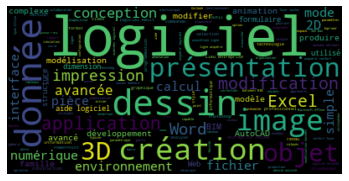

In [62]:
plt.imshow(nuagelogiciel, interpolation='bilinear')
plt.axis("off")
plt.show()

In [63]:
logiciel.pivot_table(index=['Domaine'], values='ID',aggfunc=len).sort_values(by='ID', ascending=False)

,ID
Domaine,
Administration et gestion,100
"Dessin technique, graphisme et impression",56
Informatique et T.I.,52
Construction et architecture,50
"Multimédia, modélisation, divertissement interactif et sites Web",37
Gestion de projets,10
Formation à distance,9
Génie,9
Géomatique,8


In [64]:
HTML(logiciel['Description (HTML)'].loc[logiciel['Domaine'].str.contains("Agri")].iloc[0])

In [65]:
logiciel.pivot_table(index=['Domaine', 'Collège'], values='ID',aggfunc=len).sort_values(by='ID', ascending=False)

,,ID
Domaine,Collège,
Construction et architecture,Vieux Montréal,25
Administration et gestion,Limoilou,21
Construction et architecture,Limoilou,18
"Dessin technique, graphisme et impression",Limoilou,18
Informatique et T.I.,Outaouais,14
...,...,...
Gestion de projets,Outaouais,1
Génie,Ahuntsic,1
"Industriel : production manufacturière, amélioration continue, automatisation industrielle, essais non destructifs, maintenance",Victoriaville,1


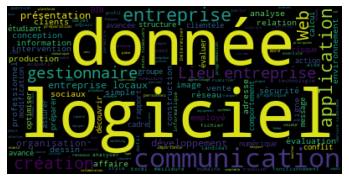

In [66]:
plt.imshow(nuagemots, interpolation='bilinear')
plt.axis("off")
plt.show()

In [67]:
fede.pivot_table(index=['Domaine'], values='ID',aggfunc=len).sort_values(by='ID', ascending=False)

,ID
Domaine,
Administration et gestion,508
Formation à distance,272
Informatique et T.I.,255
Ressources humaines,184
Langues et francisation,140
"Multimédia, modélisation, divertissement interactif et sites Web",112
Construction et architecture,109
Santé,105
Marketing et vente,100


In [68]:
fede.pivot_table(index=['Région'], values='ID', aggfunc=len).sort_values(by='ID', ascending=False)

,ID
Région,
Montréal,719
Chaudière-Appalaches,404
Capitale-Nationale,337
Montérégie,304
Saguenay - Lac-Saint-Jean,261
Mauricie - Centre-du-Québec,258
"Laval, Laurentides, Lanaudière",206
Bas-Saint-Laurent - Gaspésie,93
Outaouais,55
